<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Copy_of_Untitled171longerdrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install qiskit
%pip install qiskit-aer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Using experiment: Experiment_2025-07-03_14-34-25 ---

--- Processing Replica 1/10 ---
--- Starting new replica ---


Simulating Replica: 0it [00:00, ?it/s]

--- KNOCKOUT on day 851: Cautious wins. ---


/tmp/ipython-input-3-1351631048.py:341: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show(); plt.close(fig)


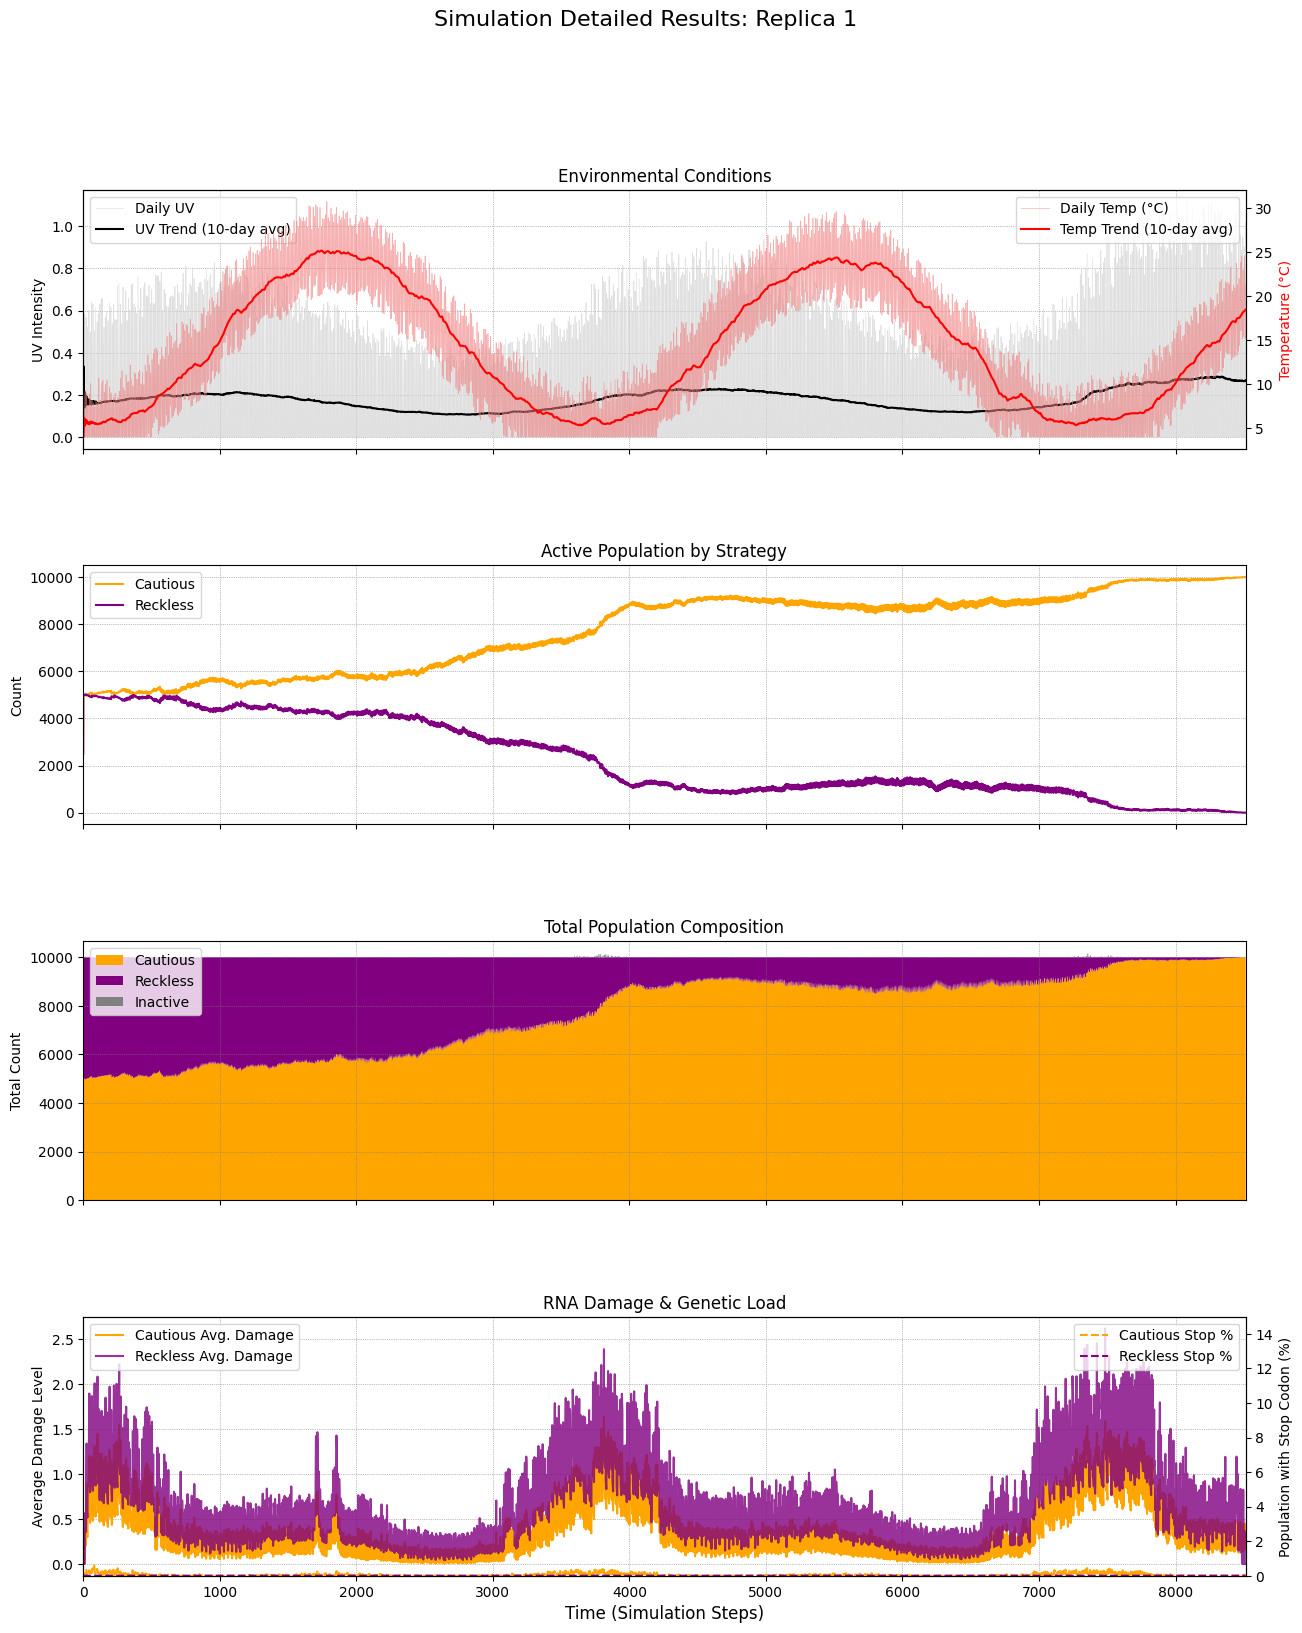


--- Processing Replica 2/10 ---
--- Starting new replica ---


Simulating Replica: 0it [00:00, ?it/s]

--- KNOCKOUT on day 1424: Cautious wins. ---


/tmp/ipython-input-3-1351631048.py:341: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show(); plt.close(fig)


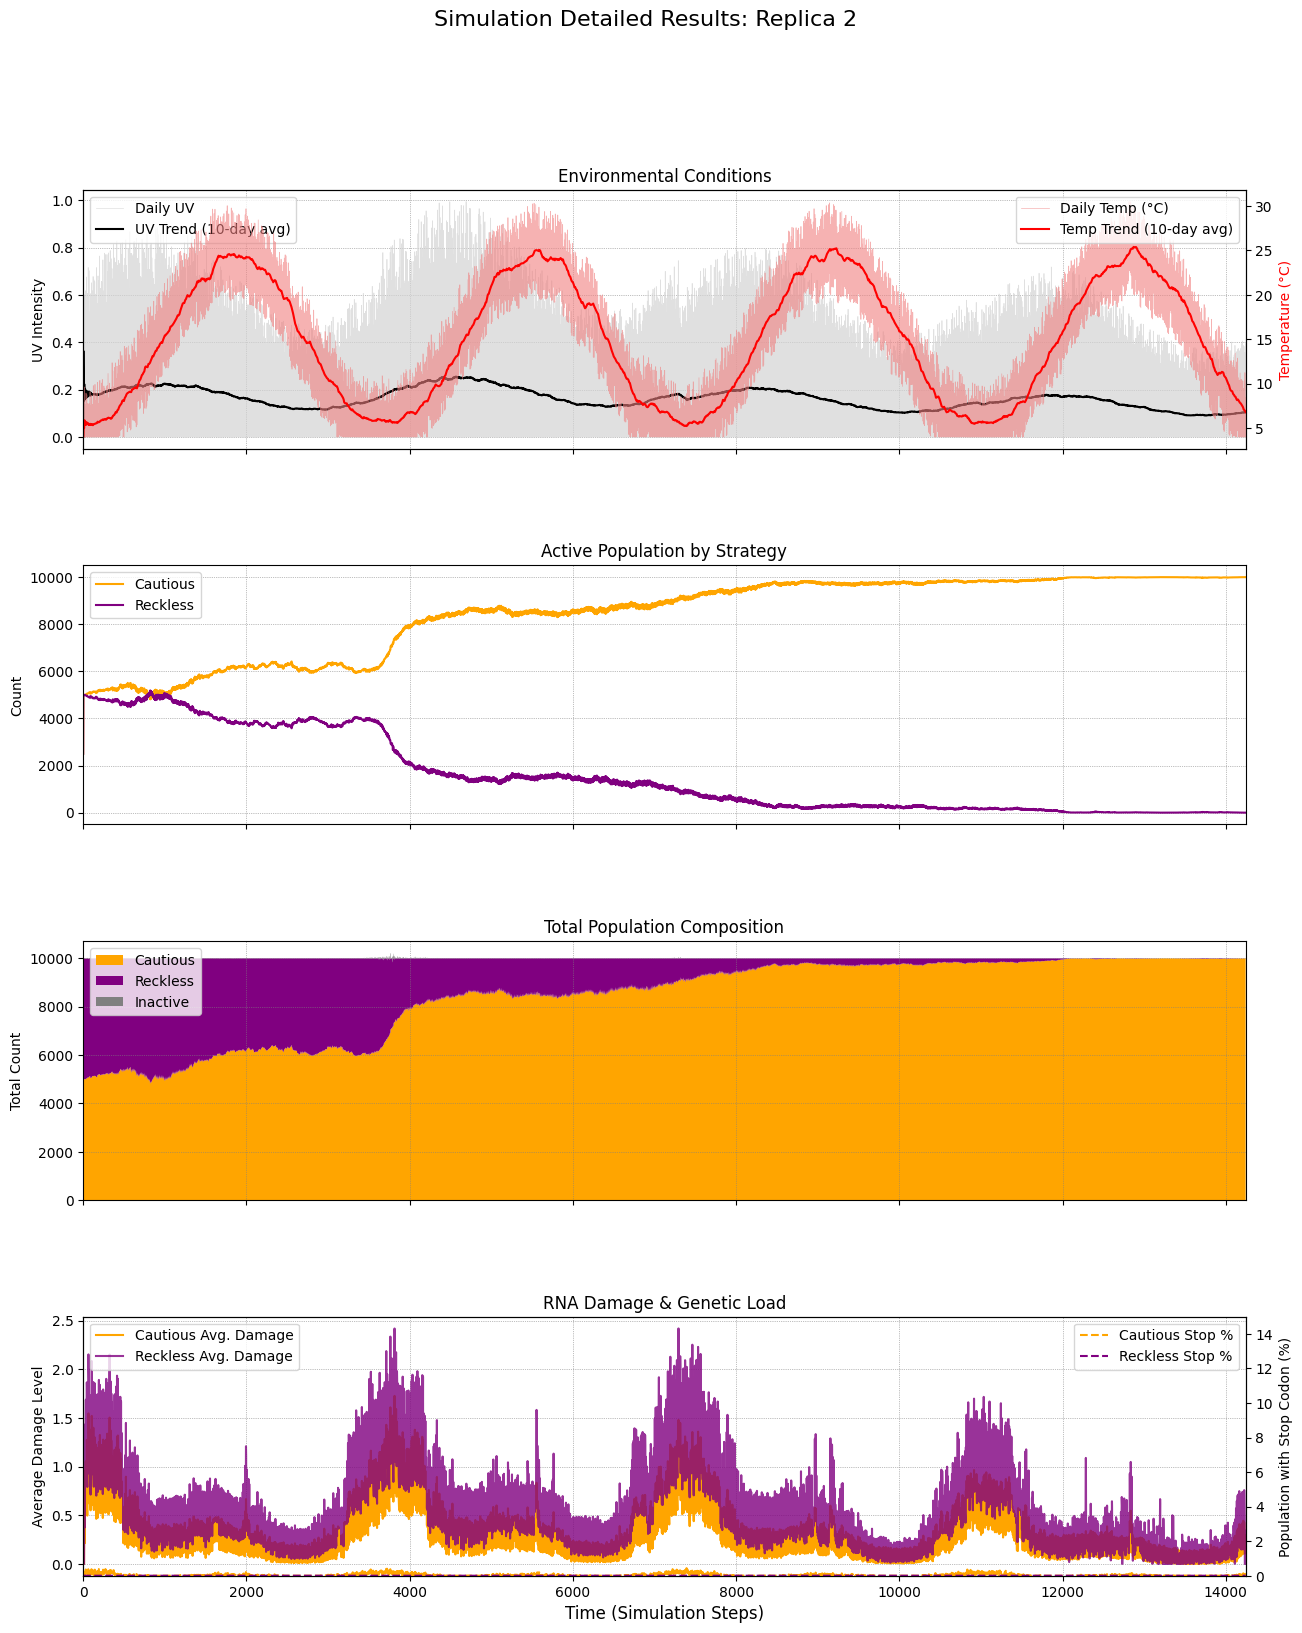


--- Processing Replica 3/10 ---
--- Starting new replica ---


Simulating Replica: 0it [00:00, ?it/s]

--- KNOCKOUT on day 853: Cautious wins. ---


/tmp/ipython-input-3-1351631048.py:341: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show(); plt.close(fig)


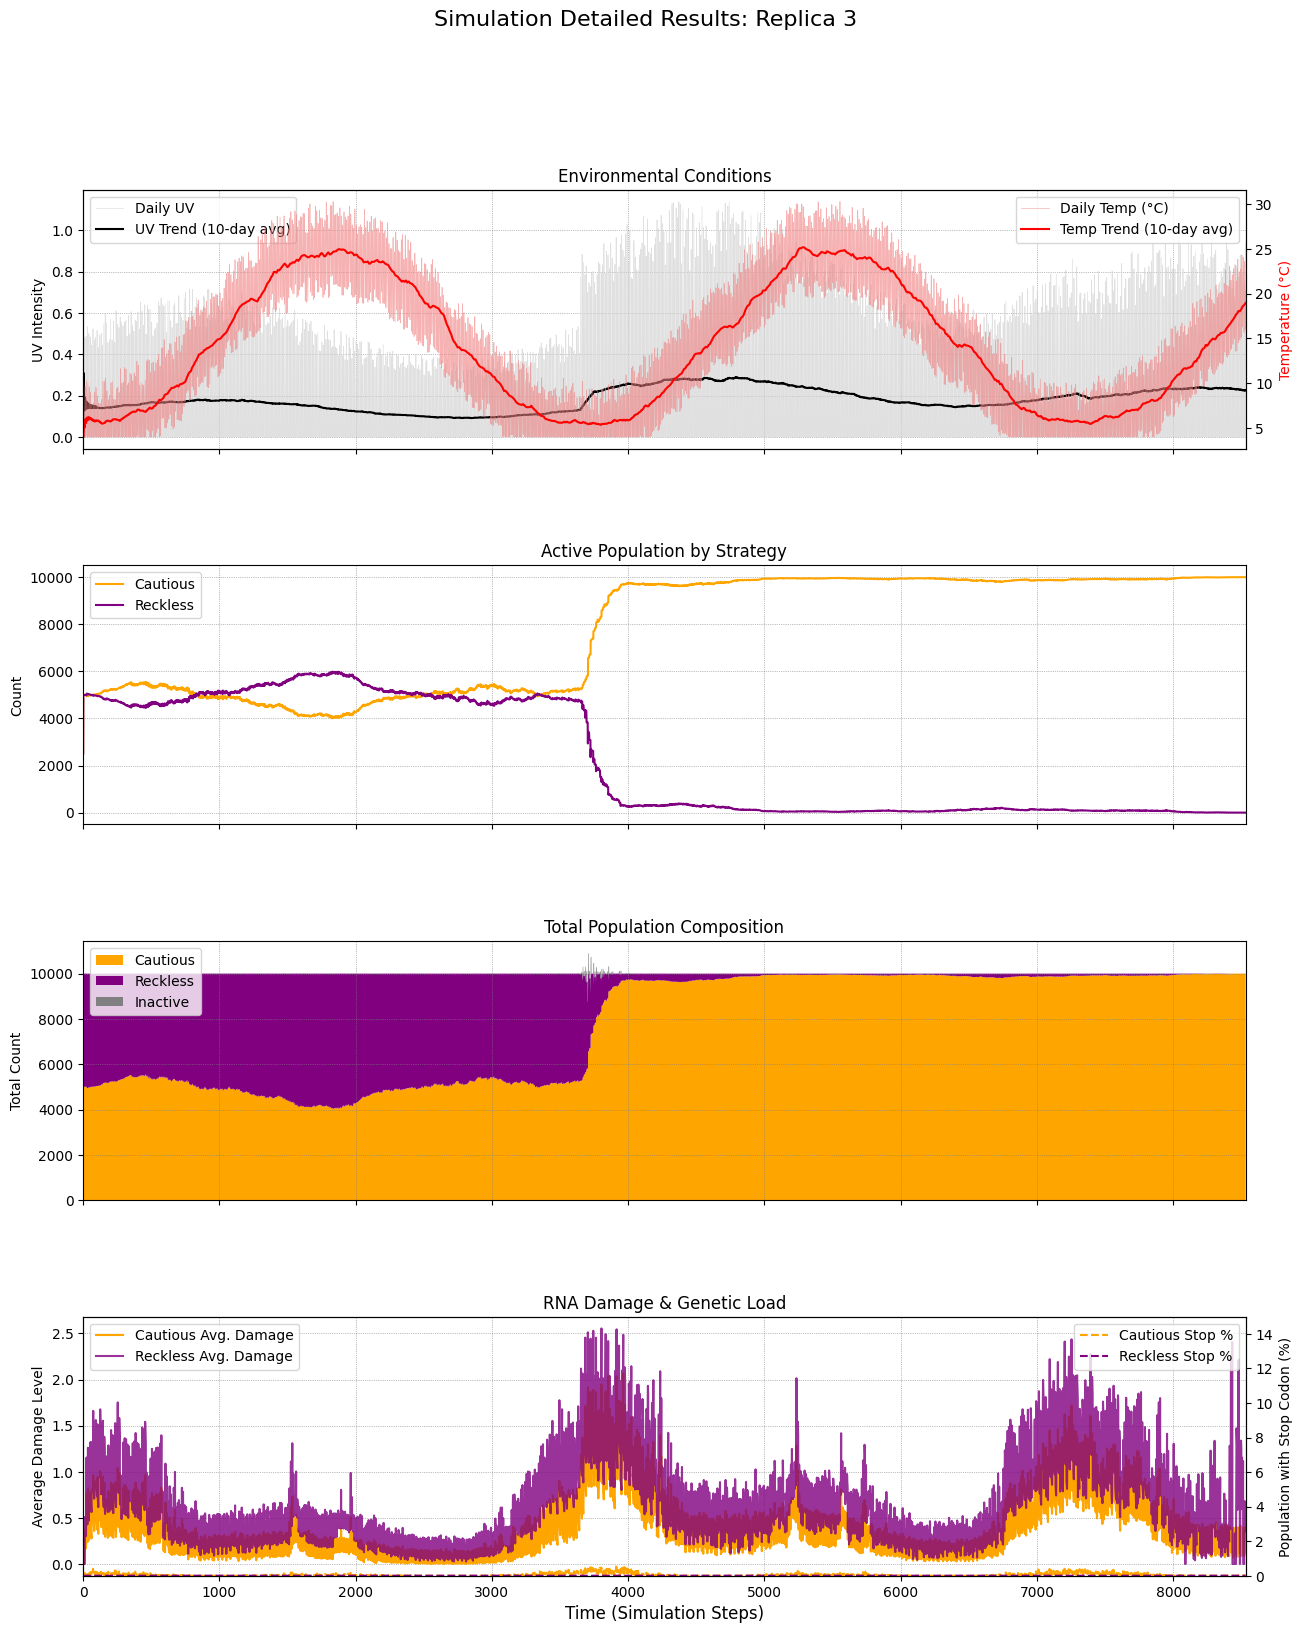


--- Processing Replica 4/10 ---
--- Starting new replica ---


Simulating Replica: 0it [00:00, ?it/s]

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import pickle
from datetime import datetime
from google.colab import output
from tqdm.notebook import tqdm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from google.colab import drive
drive.mount('/content/drive')

class QuantumRandomGenerator:
    def __init__(self, num_bits_precision=64):
        self.simulator = AerSimulator()
        self.num_bits = num_bits_precision
    def get_seed(self):
        qc = QuantumCircuit(self.num_bits, self.num_bits)
        qc.h(range(self.num_bits))
        qc.measure(range(self.num_bits), range(self.num_bits))
        job = self.simulator.run(transpile(qc, self.simulator), shots=1)
        bit_string = list(job.result().get_counts(0).keys())[0]
        return int(bit_string, 2)

class Environment:
    def __init__(self, rng, days_per_cycle=50):
        self.days_per_cycle, self.time, self.rng = days_per_cycle, 0, rng
        self.steps_per_year = 365 * self.days_per_cycle
        self.uv_intensity, self.temperature, self.yearly_uv_severity = self._generate_cycles(num_years=50)

    def _generate_cycles(self, num_years):
        daily_uv_cycle = np.sin(np.linspace(0, 2 * np.pi, self.days_per_cycle)); daily_uv_cycle[daily_uv_cycle < 0] = 0
        daily_temp_swing = -4 * np.cos(np.linspace(0, 2 * np.pi, self.days_per_cycle))
        full_uv, full_temp, yearly_severity_log = [], [], []

        total_steps = num_years * self.steps_per_year
        base_weather_noise = self.rng.standard_normal(total_steps)
        weather_window_size = 14 * self.days_per_cycle
        smoothing_window = np.ones(weather_window_size) / weather_window_size
        weather_pattern = np.convolve(base_weather_noise, smoothing_window, 'same') * 5.0

        global_step_counter = 0
        for _ in range(num_years):
            uv_severity = self.rng.uniform(0.6, 1.4)
            yearly_severity_log.extend([uv_severity] * self.steps_per_year)
            seasonal_cycle = np.sin(np.linspace(0, 2 * np.pi, self.steps_per_year))
            seasonal_temp_base = 15 - 10 * np.cos(np.linspace(0, 2 * np.pi, self.steps_per_year))
            seasonal_amplitude_mod = (0.225 * seasonal_cycle + 0.725) * uv_severity
            GEOTHERMAL_BASE_TEMP = 4.0
            year_temp = []

            daily_temp_anomaly = 0
            for i in range(self.steps_per_year):
                if i % self.days_per_cycle == 0:
                    daily_temp_anomaly = self.rng.uniform(-1.5, 1.5)

                cloud_cover_factor = self.rng.uniform(0.7, 1.0)
                daily_uv = daily_uv_cycle[i % self.days_per_cycle] * seasonal_amplitude_mod[i] * cloud_cover_factor
                full_uv.append(daily_uv)

                solar_temp = seasonal_temp_base[i] + daily_temp_swing[i % self.days_per_cycle] + weather_pattern[global_step_counter] + daily_temp_anomaly
                year_temp.append(max(GEOTHERMAL_BASE_TEMP, solar_temp))
                global_step_counter += 1
            full_temp.extend(year_temp)
        return np.array(full_uv), np.array(full_temp), np.array(yearly_severity_log)

    def get_current_uv(self): return self.uv_intensity[self.time % len(self.uv_intensity)]
    def get_current_temperature(self): return self.temperature[self.time % len(self.temperature)]
    def get_current_uv_severity(self): return self.yearly_uv_severity[self.time % len(self.yearly_uv_severity)]
    def step(self): self.time += 1

class Protoribosome:
    def __init__(self, env, strategy, initial_sequence, rng, initial_mass=100.0):
        self.env, self.strategy, self.rna_sequence, self.rng = env, strategy, list(initial_sequence), rng
        self.rna_mass, self.atp_pool = initial_mass, 500.0
        self.uv_protection_pool, self.other_peptide_pool = 50.0, 5.0
        self.rna_damage_level, self.location, self.status, self.metabolic_efficiency = 0.0, 'shadow_zone', 'ACTIVE', 1.0
        self.is_mutated = False

        if self.strategy == 'cautious': self.uv_damage_rate_per_uv = 1.0
        else: self.uv_damage_rate_per_uv = 1.4

        self.repair_rate = 0.5
        self.uv_protection_factor, self.damage_tolerance_threshold = 0.01, 3.0
        self.atp_generation_rate_per_mcyw_uv, self.baseline_atp_chemosynthesis, self.protein_synthesis_rate = 0.15, 1.5, 0.20
        self.replication_rate, self.atp_degradation_rate, self.mutation_prob = 0.05, 0.025, 0.004
        self.growth_rate, self.optimal_temp, self.temp_tolerance = 0.1, 25.0, 15.0

    def calculate_protection_score(self):
        score = 0.0
        protection_weights = {'UGG': 3.0, 'UAU': 2.0, 'UAC': 2.0, 'UGU': 1.0, 'UGC': 1.0}
        for i in range(0, len(self.rna_sequence), 3):
            codon = "".join(self.rna_sequence[i:i+3])
            score += protection_weights.get(codon, 0)
        return score

    def has_stop_codon(self):
        return any("".join(self.rna_sequence[i:i+3]) in {'UAA', 'UAG', 'UGA'} for i in range(0, len(self.rna_sequence), 3))
    def _decide_zone_transition(self):
        if self.location == 'shadow_zone' and self.atp_pool < 450: self.location = 'sunlight_zone'
        elif self.location == 'sunlight_zone' and self.rna_damage_level > self.damage_tolerance_threshold * 0.75: self.location = 'shadow_zone'
    def _apply_uv_damage(self, current_uv):
        if self.location == 'shadow_zone' or current_uv <= 0:
            self.rna_damage_level = max(0, self.rna_damage_level - self.repair_rate * 0.1)
            return
        protection = self.uv_protection_pool * self.uv_protection_factor
        effective_uv = current_uv * max(0.01, 1 - protection)
        self.rna_damage_level += effective_uv * self.uv_damage_rate_per_uv
        for i in range(len(self.rna_sequence)):
            if self.rng.random() < self.mutation_prob * effective_uv:
                self.rna_sequence[i] = self.rng.choice(list("AUGC"))
                self.is_mutated = True
    def _manage_state(self, has_stop_codon_cached):
        if self.atp_pool < 0.1 or self.rna_damage_level >= self.damage_tolerance_threshold: self.status = 'INACTIVE'; return
        if self.strategy == 'cautious' and has_stop_codon_cached: self.status = 'ARRESTED'
        elif self.status == 'ARRESTED' and not has_stop_codon_cached: self.status = 'ACTIVE'
        self.metabolic_efficiency = 1.25 if self.status == 'ACTIVE' else 1.0
    def _synthesize_protein(self, has_stop_codon_cached, temp_factor):
        if self.status != 'ACTIVE': return
        if self.strategy == 'readthrough' and has_stop_codon_cached: self.status = 'INACTIVE'; return
        protection_score = self.calculate_protection_score()
        units = self.protein_synthesis_rate * self.metabolic_efficiency * temp_factor
        if protection_score > 0: self.uv_protection_pool += units * protection_score
        else: self.other_peptide_pool += units * 10
        self.atp_pool -= units * 0.02 * len(self.rna_sequence)
    def _replicate_rna(self, temp_factor):
        if self.status != 'ACTIVE' or self.rna_mass < 80: return None
        can_replicate = self.rna_mass * self.replication_rate * self.metabolic_efficiency * temp_factor
        if self.atp_pool > can_replicate * 0.2:
            offspring_mass = self.rna_mass * 0.5
            self.rna_mass -= offspring_mass
            self.atp_pool -= can_replicate * 0.2
            new_protoribosome = Protoribosome(self.env, self.strategy, "".join(self.rna_sequence), self.rng, offspring_mass)
            new_protoribosome.is_mutated = self.is_mutated
            return new_protoribosome
        return None
    def _repair_rna_dna(self, dna_template, temp_factor):
        if self.strategy == 'readthrough' or not self.is_mutated: return
        repair_efficiency = temp_factor
        if self.status == 'ARRESTED': repair_efficiency *= 0.2
        elif self.status != 'ACTIVE': return
        repaired = False
        for i in range(len(self.rna_sequence)):
            if self.rna_sequence[i] != dna_template[i]:
                if self.rng.random() < repair_efficiency and self.atp_pool > 0.0025:
                    self.atp_pool -= 0.0025
                    self.rna_sequence[i] = dna_template[i]
                    self.rna_damage_level = max(0, self.rna_damage_level - self.repair_rate)
                    repaired = True
                break
        if repaired and "".join(self.rna_sequence) == dna_template:
            self.is_mutated = False
    def _grow_mass(self, temp_factor):
        if self.status != 'ACTIVE': return
        potential_growth = self.rna_mass * self.growth_rate * self.metabolic_efficiency * temp_factor
        self.rna_mass += potential_growth
        self.atp_pool -= potential_growth * 0.1
    def step(self, current_uv, current_temp, dna_template):
        if self.status == 'INACTIVE': return None
        if current_temp < 10: temp_factor = 0.2 + ((current_temp - 5) / 5.0) * 0.8
        elif current_temp > 22: temp_factor = 1.0 - (current_temp - 22) / 6.0
        else: temp_factor = 1.0
        temp_factor = max(0.1, temp_factor)

        self._decide_zone_transition()
        self._apply_uv_damage(current_uv)
        self._repair_rna_dna(dna_template, temp_factor)
        has_stop = self.has_stop_codon()
        self._manage_state(has_stop)
        if self.status == 'INACTIVE': return None
        self.atp_pool = (self.atp_pool + self.baseline_atp_chemosynthesis) * (1 - self.atp_degradation_rate)
        if self.location == 'sunlight_zone' and current_uv > 0:
            photosynthesis_gain = self.atp_generation_rate_per_mcyw_uv * self.uv_protection_pool * current_uv
            if current_temp > 18: photosynthesis_gain *= 1.5
            self.atp_pool += photosynthesis_gain
        self._grow_mass(temp_factor)
        self._synthesize_protein(has_stop, temp_factor)
        if self.status == 'INACTIVE': return None
        return self._replicate_rna(temp_factor)

class Colony:
    def __init__(self, env, dna_template, initial_pop_size, steps_per_day, rng, shuffle_rng):
        self.env, self.dna_template, self.steps_per_day = env, dna_template, steps_per_day
        self.max_population = 10000
        self.rng, self.shuffle_rng = rng, shuffle_rng
        self.active_population = [Protoribosome(env, 'cautious' if i%2==0 else 'readthrough', dna_template, rng) for i in range(initial_pop_size)]
        self.inactive_population = []
    def step(self, current_step):
        current_uv, current_temp = self.env.get_current_uv(), self.env.get_current_temperature()
        if current_step > 0 and current_step % self.steps_per_day == 0: self.inactive_population.clear()
        next_generation = []
        for protoribosome in self.active_population:
            new_offspring = protoribosome.step(current_uv, current_temp, self.dna_template)
            if protoribosome.status != 'INACTIVE': next_generation.append(protoribosome)
            else: self.inactive_population.append(protoribosome)
            if new_offspring: next_generation.append(new_offspring)
        self.active_population = next_generation
        if len(self.active_population) > self.max_population:
            self.shuffle_rng.shuffle(self.active_population)
            self.active_population = self.active_population[:self.max_population]

    def get_aggregated_data(self):
        data = {'cautious': 0, 'readthrough': 0, 'arrested': 0, 'in_sunlight_zone': 0, 'cautious_avg_damage': 0.0, 'readthrough_avg_damage': 0.0}
        if not self.active_population: return {**data, 'inactive': len(self.inactive_population)}
        for p in self.active_population:
            if p.strategy == 'cautious':
                data['cautious'] += 1; data['cautious_avg_damage'] += p.rna_damage_level
                if p.status == 'ARRESTED': data['arrested'] += 1
            else: data['readthrough'] += 1; data['readthrough_avg_damage'] += p.rna_damage_level
            if p.location == 'sunlight_zone': data['in_sunlight_zone'] += 1
        if data['cautious'] > 0: data['cautious_avg_damage'] /= data['cautious']
        if data['readthrough'] > 0: data['readthrough_avg_damage'] /= data['readthrough']
        data['inactive'] = len(self.inactive_population)
        return data

    def get_genetic_load_analysis(self):
        cautious_total = cautious_with_stop = reckless_total = reckless_with_stop = 0
        for p in self.active_population:
            has_stop = p.has_stop_codon()
            if p.strategy == 'cautious':
                cautious_total += 1
                if has_stop: cautious_with_stop += 1
            else:
                reckless_total += 1
                if has_stop: reckless_with_stop += 1
        # --- MODIFIED: Return raw counts for postfix display ---
        return cautious_total, cautious_with_stop, reckless_total, reckless_with_stop

def run_single_simulation(steps_per_day, rng, shuffle_rng, save_path):
    state_file, temp_file, bak_file = save_path+".pkl", save_path+".tmp", save_path+".bak"
    colony, start_step, data_log = None, 0, []

    def try_load(file):
        if not os.path.exists(file): return None
        try:
            with open(file, 'rb') as f: return pickle.load(f)
        except Exception as e:
            print(f"Warning: Could not load {os.path.basename(file)} ({e}).")
            return None

    state = try_load(state_file) or try_load(temp_file) or try_load(bak_file)
    if state:
        print(f"--- Resuming simulation from step {state['step_count']} ---")
        colony, start_step, data_log = state['colony'], state['step_count'], state['log']
        for p in colony.active_population: # Patch old objects
            if not hasattr(p, 'is_mutated'): p.is_mutated = True
            if not hasattr(p, 'uv_protection_pool'): p.uv_protection_pool = 50.0
        colony.env.time = start_step

    if not colony:
        print("--- Starting new replica ---")
        colony = Colony(Environment(rng, steps_per_day), "AUGUGUUACUGG", 5000, steps_per_day, rng, shuffle_rng)

    progress_bar = tqdm(desc="Simulating Replica", initial=start_step, total=float('inf'), leave=False)
    for step_count in range(start_step, 999_999):
        agg_data = colony.get_aggregated_data()
        c_count, r_count = agg_data['cautious'], agg_data['readthrough']

        if step_count > 1000 and (c_count == 0 or r_count == 0): break

        colony.step(step_count)

        # --- MODIFIED: Get raw counts and calculate percentages for logging ---
        c_tot, c_stop, r_tot, r_stop = colony.get_genetic_load_analysis()
        c_stop_pct = (c_stop / c_tot * 100) if c_tot > 0 else 0
        r_stop_pct = (r_stop / r_tot * 100) if r_tot > 0 else 0

        log_entry = {'time': colony.env.time, 'uv': colony.env.get_current_uv(), 'temp': colony.env.get_current_temperature(),
                     'uv_severity': colony.env.get_current_uv_severity(), **agg_data,
                     'cautious_stop_pct': c_stop_pct, 'reckless_stop_pct': r_stop_pct }
        data_log.append(log_entry)
        colony.env.step()
        progress_bar.update(1)

        # --- NEW: Update postfix with requested status format ---
        if step_count % 25 == 0:
            c_status = f"{c_stop}/{c_tot}"
            r_status = f"{r_stop}/{r_tot}"
            progress_bar.set_postfix_str(f"Cautious: {c_status} | Reckless: {r_status}")

        if step_count > 0 and step_count % 500 == 0:
            if os.path.exists(state_file):
                try: os.replace(state_file, bak_file)
                except OSError as e: print(f"Warning: Could not create backup file: {e}")
            with open(temp_file, 'wb') as f: pickle.dump({'step_count': step_count, 'colony': colony, 'log': data_log}, f)
            os.replace(temp_file, state_file)

    progress_bar.close()
    winner = "Cautious" if r_count == 0 else "Reckless" if c_count == 0 else "Mutual Extinction"
    final_day = (step_count - 1) // steps_per_day
    print(f"--- KNOCKOUT on day {final_day}: {winner} wins. ---")

    results_df = pd.DataFrame(data_log)
    summary = {'Winner': winner, 'Duration (Days)': final_day, 'Final Cautious': c_count, 'Final Reckless': r_count}
    results_df.to_pickle(save_path + ".df.pkl")
    for f in [state_file, temp_file, bak_file]:
        if os.path.exists(f): os.remove(f)
    return summary, results_df

def plot_simulation_details(results_df, replica_title=""):
    if results_df.empty: print("No data to plot."); return
    fig, axs = plt.subplots(4, 1, figsize=(15, 18), sharex=True, gridspec_kw={'hspace': 0.45})
    fig.suptitle(f'Simulation Detailed Results: {replica_title}', fontsize=16)
    colors = {'cautious': 'orange', 'readthrough': 'purple', 'inactive': 'grey'}
    rolling_window = 10 * 10

    axs[0].set_title('Environmental Conditions')
    axs[0].plot(results_df['time'], results_df['uv'], color='lightgray', alpha=0.7, label='Daily UV', lw=0.5)
    axs[0].plot(results_df['time'], results_df['uv'].rolling(window=rolling_window, min_periods=1).mean(), color='black', label=f'UV Trend ({rolling_window//10}-day avg)', lw=1.5)
    axs[0].set_ylabel('UV Intensity')
    ax0t = axs[0].twinx()
    ax0t.plot(results_df['time'], results_df['temp'], color='lightcoral', alpha=0.6, label='Daily Temp (°C)', lw=0.5)
    ax0t.plot(results_df['time'], results_df['temp'].rolling(window=rolling_window, min_periods=1).mean(), color='red', label=f'Temp Trend ({rolling_window//10}-day avg)', lw=1.5)
    ax0t.set_ylabel('Temperature (°C)', color='r')
    axs[0].legend(loc='upper left'); ax0t.legend(loc='upper right')

    axs[1].plot(results_df['time'], results_df['cautious'], label='Cautious', color=colors['cautious'])
    axs[1].plot(results_df['time'], results_df['readthrough'], label='Reckless', color=colors['readthrough'])
    axs[1].set_title('Active Population by Strategy'); axs[1].set_ylabel('Count'); axs[1].legend()

    axs[2].stackplot(results_df['time'], results_df['cautious'], results_df['readthrough'], results_df['inactive'],
                     labels=['Cautious', 'Reckless', 'Inactive'], colors=[colors['cautious'], colors['readthrough'], colors['inactive']])
    axs[2].set_title('Total Population Composition'); axs[2].set_ylabel('Total Count'); axs[2].legend(loc='upper left')

    axs[3].set_title('RNA Damage & Genetic Load')
    axs[3].plot(results_df['time'], results_df['cautious_avg_damage'], label='Cautious Avg. Damage', color=colors['cautious'])
    axs[3].plot(results_df['time'], results_df['readthrough_avg_damage'], label='Reckless Avg. Damage', color=colors['readthrough'], alpha=0.8)
    axs[3].set_ylabel('Average Damage Level'); axs[3].legend(loc='upper left')
    ax3t = axs[3].twinx()
    ax3t.plot(results_df['time'], results_df['cautious_stop_pct'], label='Cautious Stop %', color=colors['cautious'], linestyle='--')
    ax3t.plot(results_df['time'], results_df['reckless_stop_pct'], label='Reckless Stop %', color=colors['readthrough'], linestyle='--')
    ax3t.set_ylabel('Population with Stop Codon (%)'); ax3t.legend(loc='upper right')
    max_y_limit = max(15, results_df['cautious_stop_pct'].max()*1.1, results_df['reckless_stop_pct'].max()*1.1) if not results_df.empty else 15
    ax3t.set_ylim(0, max_y_limit)

    for ax in axs: ax.grid(True, linestyle=':', linewidth='0.5', color='gray')
    axs[-1].set_xlabel("Time (Simulation Steps)", fontsize=12); axs[-1].set_xlim(left=0, right=results_df['time'].max())
    plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show(); plt.close(fig)

def main_orchestrator(action, num_replicas, steps_per_day):
    BASE_SAVE_DIR = os.path.join('/content/drive/My Drive/Colab Notebooks/Sim_Experiments/')
    os.makedirs(BASE_SAVE_DIR, exist_ok=True)
    all_runs = sorted([d for d in os.listdir(BASE_SAVE_DIR) if d.startswith('Experiment_')])

    experiment_dir = None
    if action == 'fresh_start' or (action == 'resume' and not all_runs):
        if action == 'resume': print(f"--- No past experiment found to resume. Starting fresh. ---")
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        experiment_dir = os.path.join(BASE_SAVE_DIR, f"Experiment_{timestamp}")
        os.makedirs(experiment_dir, exist_ok=True)
    else:
        experiment_dir = os.path.join(BASE_SAVE_DIR, all_runs[-1])
    print(f"--- Using experiment: {os.path.basename(experiment_dir)} ---")

    if action in ('plot_only', 'monitor'):
        replica_dirs = sorted([os.path.join(experiment_dir, d) for d in os.listdir(experiment_dir) if d.startswith('Replica_')])
        if not replica_dirs: print("No replica data found in this experiment."); return

        latest_replica_dir = replica_dirs[-1]
        print(f"--- Plotting most recent data from: {os.path.basename(latest_replica_dir)} ---")
        base_path = os.path.join(latest_replica_dir, "simulation")
        final_df_path, state_path, bak_path = base_path + ".df.pkl", base_path + ".pkl", base_path + ".bak"

        if os.path.exists(final_df_path):
            results_df = pd.read_pickle(final_df_path)
            plot_simulation_details(results_df, replica_title=f"{os.path.basename(latest_replica_dir)} (Completed)")
        else:
            state = None
            try:
                with open(state_path, 'rb') as f: state = pickle.load(f)
            except:
                try:
                    with open(bak_path, 'rb') as f: state = pickle.load(f)
                except: pass
            if state and 'log' in state:
                results_df = pd.DataFrame(state['log'])
                plot_simulation_details(results_df, replica_title=f"{os.path.basename(latest_replica_dir)} (In-Progress)")
            else: print("No data found to plot for this replica.")
        return

    all_summaries = []
    for i in range(1, num_replicas + 1):
        replica_dir = os.path.join(experiment_dir, f"Replica_{i}")
        os.makedirs(replica_dir, exist_ok=True)
        replica_save_base = os.path.join(replica_dir, "simulation")
        if os.path.exists(replica_save_base + ".df.pkl"):
            # Load summary if replica is complete
            try:
                results_df = pd.read_pickle(replica_save_base + ".df.pkl")
                last_row = results_df.iloc[-1]
                c_count, r_count = last_row.get('cautious', 0), last_row.get('readthrough', 0)
                winner = "Cautious" if r_count == 0 else "Reckless" if c_count == 0 else "Mutual Extinction"
                summary = {'Replica': i, 'Winner': winner, 'Duration (Days)': (last_row['time']-1)//steps_per_day,
                           'Final Cautious': c_count, 'Final Reckless': r_count}
                all_summaries.append(summary)
                print(f"--- Replica {i} already completed. Loaded summary. ---")
            except Exception as e:
                print(f"Could not load results for completed replica {i}: {e}")
            continue

        print(f"\n--- Processing Replica {i}/{num_replicas} ---")
        seed_file_path = os.path.join(replica_dir, 'quantum_seed.txt')
        if not os.path.exists(seed_file_path):
            quantum_seed = QuantumRandomGenerator(29).get_seed()
            with open(seed_file_path, 'w') as f: f.write(str(quantum_seed))
        else:
            with open(seed_file_path, 'r') as f: quantum_seed = int(f.read())

        sim_rng = np.random.default_rng(seed=quantum_seed)
        shuffle_rng = random.Random(quantum_seed)

        summary, details_df = run_single_simulation(steps_per_day, sim_rng, shuffle_rng, replica_save_base)
        summary['Replica'] = i
        all_summaries.append(summary)
        plot_simulation_details(details_df, replica_title=f"Replica {i}")

    print("\n\n" + "="*50 + "\n" + " EXPERIMENT SUMMARY ".center(50, "=") + "\n" + "="*50)
    if all_summaries:
        summary_df = pd.DataFrame(all_summaries).set_index('Replica')
        print(summary_df.to_string())
    print("="*50)

if __name__ == "__main__":
    CHOSEN_ACTION = 'fresh_start'
    NUM_REPLICAS = 10
    STEPS_PER_DAY = 10
    main_orchestrator(CHOSEN_ACTION, NUM_REPLICAS, STEPS_PER_DAY)


import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import pickle
from datetime import datetime
from google.colab import output
from tqdm.notebook import tqdm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from google.colab import drive
drive.mount('/content/drive')

class QuantumRandomGenerator:
    def __init__(self, num_bits_precision=64):
        self.simulator = AerSimulator()
        self.num_bits = num_bits_precision
    def get_seed(self):
        qc = QuantumCircuit(self.num_bits, self.num_bits)
        qc.h(range(self.num_bits))
        qc.measure(range(self.num_bits), range(self.num_bits))
        job = self.simulator.run(transpile(qc, self.simulator), shots=1)
        bit_string = list(job.result().get_counts(0).keys())[0]
        return int(bit_string, 2)

class Environment:
    def __init__(self, rng, days_per_cycle=50):
        self.days_per_cycle, self.time, self.rng = days_per_cycle, 0, rng
        self.steps_per_year = 365 * self.days_per_cycle
        self.uv_intensity, self.temperature, self.yearly_uv_severity = self._generate_cycles(num_years=50)

    def _generate_cycles(self, num_years):
        daily_uv_cycle = np.sin(np.linspace(0, 2 * np.pi, self.days_per_cycle)); daily_uv_cycle[daily_uv_cycle < 0] = 0
        daily_temp_swing = -4 * np.cos(np.linspace(0, 2 * np.pi, self.days_per_cycle))
        full_uv, full_temp, yearly_severity_log = [], [], []

        total_steps = num_years * self.steps_per_year
        base_weather_noise = self.rng.standard_normal(total_steps)
        weather_window_size = 14 * self.days_per_cycle
        smoothing_window = np.ones(weather_window_size) / weather_window_size
        weather_pattern = np.convolve(base_weather_noise, smoothing_window, 'same') * 5.0

        global_step_counter = 0
        for _ in range(num_years):
            uv_severity = self.rng.uniform(0.6, 1.4)
            yearly_severity_log.extend([uv_severity] * self.steps_per_year)
            seasonal_cycle = np.sin(np.linspace(0, 2 * np.pi, self.steps_per_year))
            seasonal_temp_base = 15 - 10 * np.cos(np.linspace(0, 2 * np.pi, self.steps_per_year))
            seasonal_amplitude_mod = (0.225 * seasonal_cycle + 0.725) * uv_severity
            GEOTHERMAL_BASE_TEMP = 4.0
            year_temp = []
            
            daily_temp_anomaly = 0
            for i in range(self.steps_per_year):
                if i % self.days_per_cycle == 0:
                    daily_temp_anomaly = self.rng.uniform(-1.5, 1.5)

                cloud_cover_factor = self.rng.uniform(0.7, 1.0)
                daily_uv = daily_uv_cycle[i % self.days_per_cycle] * seasonal_amplitude_mod[i] * cloud_cover_factor
                full_uv.append(daily_uv)
                
                solar_temp = seasonal_temp_base[i] + daily_temp_swing[i % self.days_per_cycle] + weather_pattern[global_step_counter] + daily_temp_anomaly
                year_temp.append(max(GEOTHERMAL_BASE_TEMP, solar_temp))
                global_step_counter += 1
            full_temp.extend(year_temp)
        return np.array(full_uv), np.array(full_temp), np.array(yearly_severity_log)

    def get_current_uv(self): return self.uv_intensity[self.time % len(self.uv_intensity)]
    def get_current_temperature(self): return self.temperature[self.time % len(self.temperature)]
    def get_current_uv_severity(self): return self.yearly_uv_severity[self.time % len(self.yearly_uv_severity)]
    def step(self): self.time += 1

class Protoribosome:
    def __init__(self, env, strategy, initial_sequence, rng, initial_mass=100.0):
        self.env, self.strategy, self.rna_sequence, self.rng = env, strategy, list(initial_sequence), rng
        self.rna_mass, self.atp_pool = initial_mass, 500.0
        self.uv_protection_pool, self.other_peptide_pool = 50.0, 5.0
        self.rna_damage_level, self.location, self.status, self.metabolic_efficiency = 0.0, 'shadow_zone', 'ACTIVE', 1.0
        self.is_mutated = False
        
        if self.strategy == 'cautious': self.uv_damage_rate_per_uv = 1.0
        else: self.uv_damage_rate_per_uv = 1.4
            
        self.repair_rate = 0.5
        self.uv_protection_factor, self.damage_tolerance_threshold = 0.01, 3.0
        self.atp_generation_rate_per_mcyw_uv, self.baseline_atp_chemosynthesis, self.protein_synthesis_rate = 0.15, 1.5, 0.20
        self.replication_rate, self.atp_degradation_rate, self.mutation_prob = 0.05, 0.025, 0.004
        self.growth_rate, self.optimal_temp, self.temp_tolerance = 0.1, 25.0, 15.0

    def calculate_protection_score(self):
        score = 0.0
        protection_weights = {'UGG': 3.0, 'UAU': 2.0, 'UAC': 2.0, 'UGU': 1.0, 'UGC': 1.0}
        for i in range(0, len(self.rna_sequence), 3):
            codon = "".join(self.rna_sequence[i:i+3])
            score += protection_weights.get(codon, 0)
        return score

    def has_stop_codon(self):
        return any("".join(self.rna_sequence[i:i+3]) in {'UAA', 'UAG', 'UGA'} for i in range(0, len(self.rna_sequence), 3))
    def _decide_zone_transition(self):
        if self.location == 'shadow_zone' and self.atp_pool < 450: self.location = 'sunlight_zone'
        elif self.location == 'sunlight_zone' and self.rna_damage_level > self.damage_tolerance_threshold * 0.75: self.location = 'shadow_zone'
    def _apply_uv_damage(self, current_uv):
        if self.location == 'shadow_zone' or current_uv <= 0:
            self.rna_damage_level = max(0, self.rna_damage_level - self.repair_rate * 0.1)
            return
        protection = self.uv_protection_pool * self.uv_protection_factor
        effective_uv = current_uv * max(0.01, 1 - protection)
        self.rna_damage_level += effective_uv * self.uv_damage_rate_per_uv
        for i in range(len(self.rna_sequence)):
            if self.rng.random() < self.mutation_prob * effective_uv:
                self.rna_sequence[i] = self.rng.choice(list("AUGC"))
                self.is_mutated = True
    def _manage_state(self, has_stop_codon_cached):
        if self.atp_pool < 0.1 or self.rna_damage_level >= self.damage_tolerance_threshold: self.status = 'INACTIVE'; return
        if self.strategy == 'cautious' and has_stop_codon_cached: self.status = 'ARRESTED'
        elif self.status == 'ARRESTED' and not has_stop_codon_cached: self.status = 'ACTIVE'
        self.metabolic_efficiency = 1.25 if self.status == 'ACTIVE' else 1.0
    def _synthesize_protein(self, has_stop_codon_cached, temp_factor):
        if self.status != 'ACTIVE': return
        if self.strategy == 'readthrough' and has_stop_codon_cached: self.status = 'INACTIVE'; return
        protection_score = self.calculate_protection_score()
        units = self.protein_synthesis_rate * self.metabolic_efficiency * temp_factor
        if protection_score > 0: self.uv_protection_pool += units * protection_score
        else: self.other_peptide_pool += units * 10
        self.atp_pool -= units * 0.02 * len(self.rna_sequence)
    def _replicate_rna(self, temp_factor):
        if self.status != 'ACTIVE' or self.rna_mass < 80: return None
        can_replicate = self.rna_mass * self.replication_rate * self.metabolic_efficiency * temp_factor
        if self.atp_pool > can_replicate * 0.2:
            offspring_mass = self.rna_mass * 0.5
            self.rna_mass -= offspring_mass
            self.atp_pool -= can_replicate * 0.2
            new_protoribosome = Protoribosome(self.env, self.strategy, "".join(self.rna_sequence), self.rng, offspring_mass)
            new_protoribosome.is_mutated = self.is_mutated
            return new_protoribosome
        return None
    def _repair_rna_dna(self, dna_template, temp_factor):
        if self.strategy == 'readthrough' or not self.is_mutated: return
        repair_efficiency = temp_factor
        if self.status == 'ARRESTED': repair_efficiency *= 0.2
        elif self.status != 'ACTIVE': return
        repaired = False
        for i in range(len(self.rna_sequence)):
            if self.rna_sequence[i] != dna_template[i]:
                if self.rng.random() < repair_efficiency and self.atp_pool > 0.0025:
                    self.atp_pool -= 0.0025
                    self.rna_sequence[i] = dna_template[i]
                    self.rna_damage_level = max(0, self.rna_damage_level - self.repair_rate)
                    repaired = True
                break
        if repaired and "".join(self.rna_sequence) == dna_template:
            self.is_mutated = False
    def _grow_mass(self, temp_factor):
        if self.status != 'ACTIVE': return
        potential_growth = self.rna_mass * self.growth_rate * self.metabolic_efficiency * temp_factor
        self.rna_mass += potential_growth
        self.atp_pool -= potential_growth * 0.1
    def step(self, current_uv, current_temp, dna_template):
        if self.status == 'INACTIVE': return None
        if current_temp < 10: temp_factor = 0.2 + ((current_temp - 5) / 5.0) * 0.8
        elif current_temp > 22: temp_factor = 1.0 - (current_temp - 22) / 6.0
        else: temp_factor = 1.0
        temp_factor = max(0.1, temp_factor)
            
        self._decide_zone_transition()
        self._apply_uv_damage(current_uv)
        self._repair_rna_dna(dna_template, temp_factor)
        has_stop = self.has_stop_codon()
        self._manage_state(has_stop)
        if self.status == 'INACTIVE': return None
        self.atp_pool = (self.atp_pool + self.baseline_atp_chemosynthesis) * (1 - self.atp_degradation_rate)
        if self.location == 'sunlight_zone' and current_uv > 0:
            photosynthesis_gain = self.atp_generation_rate_per_mcyw_uv * self.uv_protection_pool * current_uv
            if current_temp > 18: photosynthesis_gain *= 1.5
            self.atp_pool += photosynthesis_gain
        self._grow_mass(temp_factor)
        self._synthesize_protein(has_stop, temp_factor)
        if self.status == 'INACTIVE': return None
        return self._replicate_rna(temp_factor)

class Colony:
    def __init__(self, env, dna_template, initial_pop_size, steps_per_day, rng, shuffle_rng):
        self.env, self.dna_template, self.steps_per_day = env, dna_template, steps_per_day
        self.max_population = 10000
        self.rng, self.shuffle_rng = rng, shuffle_rng
        self.active_population = [Protoribosome(env, 'cautious' if i%2==0 else 'readthrough', dna_template, rng) for i in range(initial_pop_size)]
        self.inactive_population = []
    def step(self, current_step):
        current_uv, current_temp = self.env.get_current_uv(), self.env.get_current_temperature()
        if current_step > 0 and current_step % self.steps_per_day == 0: self.inactive_population.clear()
        next_generation = []
        for protoribosome in self.active_population:
            new_offspring = protoribosome.step(current_uv, current_temp, self.dna_template)
            if protoribosome.status != 'INACTIVE': next_generation.append(protoribosome)
            else: self.inactive_population.append(protoribosome)
            if new_offspring: next_generation.append(new_offspring)
        self.active_population = next_generation
        if len(self.active_population) > self.max_population:
            self.shuffle_rng.shuffle(self.active_population)
            self.active_population = self.active_population[:self.max_population]

    def get_aggregated_data(self):
        data = {'cautious': 0, 'readthrough': 0, 'arrested': 0, 'in_sunlight_zone': 0, 'cautious_avg_damage': 0.0, 'readthrough_avg_damage': 0.0}
        if not self.active_population: return {**data, 'inactive': len(self.inactive_population)}
        for p in self.active_population:
            if p.strategy == 'cautious':
                data['cautious'] += 1; data['cautious_avg_damage'] += p.rna_damage_level
                if p.status == 'ARRESTED': data['arrested'] += 1
            else: data['readthrough'] += 1; data['readthrough_avg_damage'] += p.rna_damage_level
            if p.location == 'sunlight_zone': data['in_sunlight_zone'] += 1
        if data['cautious'] > 0: data['cautious_avg_damage'] /= data['cautious']
        if data['readthrough'] > 0: data['readthrough_avg_damage'] /= data['readthrough']
        data['inactive'] = len(self.inactive_population)
        return data

    def get_genetic_load_analysis(self):
        cautious_total = cautious_with_stop = reckless_total = reckless_with_stop = 0
        for p in self.active_population:
            has_stop = p.has_stop_codon()
            if p.strategy == 'cautious':
                cautious_total += 1
                if has_stop: cautious_with_stop += 1
            else:
                reckless_total += 1
                if has_stop: reckless_with_stop += 1
        # --- MODIFIED: Return raw counts for postfix display ---
        return cautious_total, cautious_with_stop, reckless_total, reckless_with_stop

def run_single_simulation(steps_per_day, rng, shuffle_rng, save_path):
    state_file, temp_file, bak_file = save_path+".pkl", save_path+".tmp", save_path+".bak"
    colony, start_step, data_log = None, 0, []

    def try_load(file):
        if not os.path.exists(file): return None
        try:
            with open(file, 'rb') as f: return pickle.load(f)
        except Exception as e:
            print(f"Warning: Could not load {os.path.basename(file)} ({e}).")
            return None

    state = try_load(state_file) or try_load(temp_file) or try_load(bak_file)
    if state:
        print(f"--- Resuming simulation from step {state['step_count']} ---")
        colony, start_step, data_log = state['colony'], state['step_count'], state['log']
        for p in colony.active_population: # Patch old objects
            if not hasattr(p, 'is_mutated'): p.is_mutated = True
            if not hasattr(p, 'uv_protection_pool'): p.uv_protection_pool = 50.0
        colony.env.time = start_step

    if not colony:
        print("--- Starting new replica ---")
        colony = Colony(Environment(rng, steps_per_day), "AUGUGUUACUGG", 5000, steps_per_day, rng, shuffle_rng)

    progress_bar = tqdm(desc="Simulating Replica", initial=start_step, total=float('inf'), leave=False)
    for step_count in range(start_step, 999_999):
        agg_data = colony.get_aggregated_data()
        c_count, r_count = agg_data['cautious'], agg_data['readthrough']

        if step_count > 1000 and (c_count == 0 or r_count == 0): break
        
        colony.step(step_count)
        
        # --- MODIFIED: Get raw counts and calculate percentages for logging ---
        c_tot, c_stop, r_tot, r_stop = colony.get_genetic_load_analysis()
        c_stop_pct = (c_stop / c_tot * 100) if c_tot > 0 else 0
        r_stop_pct = (r_stop / r_tot * 100) if r_tot > 0 else 0
        
        log_entry = {'time': colony.env.time, 'uv': colony.env.get_current_uv(), 'temp': colony.env.get_current_temperature(),
                     'uv_severity': colony.env.get_current_uv_severity(), **agg_data,
                     'cautious_stop_pct': c_stop_pct, 'reckless_stop_pct': r_stop_pct }
        data_log.append(log_entry)
        colony.env.step()
        progress_bar.update(1)

        # --- NEW: Update postfix with requested status format ---
        if step_count % 25 == 0:
            c_status = f"{c_stop}/{c_tot}"
            r_status = f"{r_stop}/{r_tot}"
            progress_bar.set_postfix_str(f"Cautious: {c_status} | Reckless: {r_status}")

        if step_count > 0 and step_count % 500 == 0:
            if os.path.exists(state_file):
                try: os.replace(state_file, bak_file)
                except OSError as e: print(f"Warning: Could not create backup file: {e}")
            with open(temp_file, 'wb') as f: pickle.dump({'step_count': step_count, 'colony': colony, 'log': data_log}, f)
            os.replace(temp_file, state_file)
    
    progress_bar.close()
    winner = "Cautious" if r_count == 0 else "Reckless" if c_count == 0 else "Mutual Extinction"
    final_day = (step_count - 1) // steps_per_day
    print(f"--- KNOCKOUT on day {final_day}: {winner} wins. ---")
    
    results_df = pd.DataFrame(data_log)
    summary = {'Winner': winner, 'Duration (Days)': final_day, 'Final Cautious': c_count, 'Final Reckless': r_count}
    results_df.to_pickle(save_path + ".df.pkl")
    for f in [state_file, temp_file, bak_file]:
        if os.path.exists(f): os.remove(f)
    return summary, results_df

def plot_simulation_details(results_df, replica_title=""):
    if results_df.empty: print("No data to plot."); return
    fig, axs = plt.subplots(4, 1, figsize=(15, 18), sharex=True, gridspec_kw={'hspace': 0.45})
    fig.suptitle(f'Simulation Detailed Results: {replica_title}', fontsize=16)
    colors = {'cautious': 'orange', 'readthrough': 'purple', 'inactive': 'grey'}
    rolling_window = 10 * 10

    axs[0].set_title('Environmental Conditions')
    axs[0].plot(results_df['time'], results_df['uv'], color='lightgray', alpha=0.7, label='Daily UV', lw=0.5)
    axs[0].plot(results_df['time'], results_df['uv'].rolling(window=rolling_window, min_periods=1).mean(), color='black', label=f'UV Trend ({rolling_window//10}-day avg)', lw=1.5)
    axs[0].set_ylabel('UV Intensity')
    ax0t = axs[0].twinx()
    ax0t.plot(results_df['time'], results_df['temp'], color='lightcoral', alpha=0.6, label='Daily Temp (°C)', lw=0.5)
    ax0t.plot(results_df['time'], results_df['temp'].rolling(window=rolling_window, min_periods=1).mean(), color='red', label=f'Temp Trend ({rolling_window//10}-day avg)', lw=1.5)
    ax0t.set_ylabel('Temperature (°C)', color='r')
    axs[0].legend(loc='upper left'); ax0t.legend(loc='upper right')

    axs[1].plot(results_df['time'], results_df['cautious'], label='Cautious', color=colors['cautious'])
    axs[1].plot(results_df['time'], results_df['readthrough'], label='Reckless', color=colors['readthrough'])
    axs[1].set_title('Active Population by Strategy'); axs[1].set_ylabel('Count'); axs[1].legend()

    axs[2].stackplot(results_df['time'], results_df['cautious'], results_df['readthrough'], results_df['inactive'],
                     labels=['Cautious', 'Reckless', 'Inactive'], colors=[colors['cautious'], colors['readthrough'], colors['inactive']])
    axs[2].set_title('Total Population Composition'); axs[2].set_ylabel('Total Count'); axs[2].legend(loc='upper left')

    axs[3].set_title('RNA Damage & Genetic Load')
    axs[3].plot(results_df['time'], results_df['cautious_avg_damage'], label='Cautious Avg. Damage', color=colors['cautious'])
    axs[3].plot(results_df['time'], results_df['readthrough_avg_damage'], label='Reckless Avg. Damage', color=colors['readthrough'], alpha=0.8)
    axs[3].set_ylabel('Average Damage Level'); axs[3].legend(loc='upper left')
    ax3t = axs[3].twinx()
    ax3t.plot(results_df['time'], results_df['cautious_stop_pct'], label='Cautious Stop %', color=colors['cautious'], linestyle='--')
    ax3t.plot(results_df['time'], results_df['reckless_stop_pct'], label='Reckless Stop %', color=colors['readthrough'], linestyle='--')
    ax3t.set_ylabel('Population with Stop Codon (%)'); ax3t.legend(loc='upper right')
    max_y_limit = max(15, results_df['cautious_stop_pct'].max()*1.1, results_df['reckless_stop_pct'].max()*1.1) if not results_df.empty else 15
    ax3t.set_ylim(0, max_y_limit)

    for ax in axs: ax.grid(True, linestyle=':', linewidth='0.5', color='gray')
    axs[-1].set_xlabel("Time (Simulation Steps)", fontsize=12); axs[-1].set_xlim(left=0, right=results_df['time'].max())
    plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show(); plt.close(fig)

def main_orchestrator(action, num_replicas, steps_per_day):
    BASE_SAVE_DIR = os.path.join('/content/drive/My Drive/Colab Notebooks/Sim_Experiments/')
    os.makedirs(BASE_SAVE_DIR, exist_ok=True)
    all_runs = sorted([d for d in os.listdir(BASE_SAVE_DIR) if d.startswith('Experiment_')])
    
    experiment_dir = None
    if action == 'fresh_start' or (action == 'resume' and not all_runs):
        if action == 'resume': print(f"--- No past experiment found to resume. Starting fresh. ---")
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        experiment_dir = os.path.join(BASE_SAVE_DIR, f"Experiment_{timestamp}")
        os.makedirs(experiment_dir, exist_ok=True)
    else:
        experiment_dir = os.path.join(BASE_SAVE_DIR, all_runs[-1])
    print(f"--- Using experiment: {os.path.basename(experiment_dir)} ---")

    if action in ('plot_only', 'monitor'):
        replica_dirs = sorted([os.path.join(experiment_dir, d) for d in os.listdir(experiment_dir) if d.startswith('Replica_')])
        if not replica_dirs: print("No replica data found in this experiment."); return
        
        latest_replica_dir = replica_dirs[-1]
        print(f"--- Plotting most recent data from: {os.path.basename(latest_replica_dir)} ---")
        base_path = os.path.join(latest_replica_dir, "simulation")
        final_df_path, state_path, bak_path = base_path + ".df.pkl", base_path + ".pkl", base_path + ".bak"

        if os.path.exists(final_df_path):
            results_df = pd.read_pickle(final_df_path)
            plot_simulation_details(results_df, replica_title=f"{os.path.basename(latest_replica_dir)} (Completed)")
        else:
            state = None
            try:
                with open(state_path, 'rb') as f: state = pickle.load(f)
            except:
                try:
                    with open(bak_path, 'rb') as f: state = pickle.load(f)
                except: pass
            if state and 'log' in state:
                results_df = pd.DataFrame(state['log'])
                plot_simulation_details(results_df, replica_title=f"{os.path.basename(latest_replica_dir)} (In-Progress)")
            else: print("No data found to plot for this replica.")
        return

    all_summaries = []
    for i in range(1, num_replicas + 1):
        replica_dir = os.path.join(experiment_dir, f"Replica_{i}")
        os.makedirs(replica_dir, exist_ok=True)
        replica_save_base = os.path.join(replica_dir, "simulation")
        if os.path.exists(replica_save_base + ".df.pkl"):
            # Load summary if replica is complete
            try:
                results_df = pd.read_pickle(replica_save_base + ".df.pkl")
                last_row = results_df.iloc[-1]
                c_count, r_count = last_row.get('cautious', 0), last_row.get('readthrough', 0)
                winner = "Cautious" if r_count == 0 else "Reckless" if c_count == 0 else "Mutual Extinction"
                summary = {'Replica': i, 'Winner': winner, 'Duration (Days)': (last_row['time']-1)//steps_per_day,
                           'Final Cautious': c_count, 'Final Reckless': r_count}
                all_summaries.append(summary)
                print(f"--- Replica {i} already completed. Loaded summary. ---")
            except Exception as e:
                print(f"Could not load results for completed replica {i}: {e}")
            continue
        
        print(f"\n--- Processing Replica {i}/{num_replicas} ---")
        seed_file_path = os.path.join(replica_dir, 'quantum_seed.txt')
        if not os.path.exists(seed_file_path):
            quantum_seed = QuantumRandomGenerator(29).get_seed()
            with open(seed_file_path, 'w') as f: f.write(str(quantum_seed))
        else:
            with open(seed_file_path, 'r') as f: quantum_seed = int(f.read())
        
        sim_rng = np.random.default_rng(seed=quantum_seed)
        shuffle_rng = random.Random(quantum_seed)

        summary, details_df = run_single_simulation(steps_per_day, sim_rng, shuffle_rng, replica_save_base)
        summary['Replica'] = i
        all_summaries.append(summary)
        plot_simulation_details(details_df, replica_title=f"Replica {i}")

    print("\n\n" + "="*50 + "\n" + " EXPERIMENT SUMMARY ".center(50, "=") + "\n" + "="*50)
    if all_summaries:
        summary_df = pd.DataFrame(all_summaries).set_index('Replica')
        print(summary_df.to_string())
    print("="*50)

if __name__ == "__main__":
    CHOmSEN_ACTION = 'resume'
    NUM_REPLICAS = 10
    STEPS_PER_DAY = 10
    main_orchestrator(CHOSEN_ACTION, NUM_REPLICAS, STEPS_PER_DAY)
